In [ ]:
!pip install PyTDC rdkit==2023.03.1 DeepChem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tdc.single_pred import ADME
data = ADME(name = 'Caco2_Wang')
data.get_data().head(2)

Downloading...
100%|██████████| 82.5k/82.5k [00:00<00:00, 917kiB/s]
Loading...
Done!


,Drug_ID,Drug,Y
0,(-)-epicatechin,Oc1cc(O)c2c(c1)OC(c1ccc(O)c(O)c1)C(O)C2,-6.22
1,"(2E,4Z,8Z)-N-isobutyldodeca-2,4,10-triene-8 -y...",C/C=C\C#CCC/C=C\C=C\C(=O)NCC(C)C,-3.86


In [ ]:
data

In [ ]:
drugs = data.get_data()
drugs

,Drug_ID,Drug,Y
0,(-)-epicatechin,Oc1cc(O)c2c(c1)OC(c1ccc(O)c(O)c1)C(O)C2,-6.220000
1,"(2E,4Z,8Z)-N-isobutyldodeca-2,4,10-triene-8 -y...",C/C=C\C#CCC/C=C\C=C\C(=O)NCC(C)C,-3.860000
2,codeine,COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2...,-4.090000
3,creatinine,CN1CC(=O)NC1=N,-5.935409
4,danazol,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,-4.840000
...,...,...,...
905,Capric acid (decanoic acid),CCCCCCCCCC(=O)O,-4.680000
906,Apometzgerin (2),COc1cc(-c2cc(=O)c3c(O)cc(O)cc3o2)cc(O)c1OC,-4.950000
907,3,COC(=O)C[C@@H](C(=O)NN(Cc1ccc(/C=C\c2ccccc2)cc...,-5.080000
908,51d,COc1ccc2c(O[C@@H]3C[C@H]4C(=O)N[C@]5(C(=O)NS(=...,-5.300000


In [ ]:
import rdkit
rdkit.__version__

'2023.03.1'

In [ ]:
import pandas as pd
import numpy as np
from rdkit.Chem import PandasTools, Descriptors, AllChem, AddHs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import deepchem as dc

In [ ]:
# Let's add the structures to the dataframe
PandasTools.AddMoleculeColumnToFrame(drugs, 'Drug', 'Molecule')

In [ ]:
drugs.sample(5)

,Drug_ID,Drug,Y,Molecule
719,Levofloxacin,C[C@H]1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)...,-4.550000,<rdkit.Chem.rdchem.Mol object at 0x7f429cfb15b0>
50,hexapeptide 20,C[C@@H]1NC(=O)[C@@H](C)NC(=O)[C@@H](C)N(C)C(=O...,-5.820000,<rdkit.Chem.rdchem.Mol object at 0x7f429cf56ea0>
193,17,Cc1ccc(C(F)(F)CNc2ccc(C#N)c(CC(=O)NCCONC(=N)N)...,-6.188375,<rdkit.Chem.rdchem.Mol object at 0x7f429cfa2dc0>
834,3'-Cl BZT,CN1C2CC[C@@H]1CC(OC(c1ccccc1)c1cccc(Cl)c1)C2,-4.662271,<rdkit.Chem.rdchem.Mol object at 0x7f429cfb4890>
829,MEN14970,O=C(NC1(C(=O)N[C@H](Cc2ccccc2)C(=O)NCCCN2CCOCC...,-4.930907,<rdkit.Chem.rdchem.Mol object at 0x7f429cfb4660>


In [ ]:
# There are no hydrogens in these structures. 
for idx, mol in enumerate(drugs.Molecule):
  drugs.Molecule[idx] = rdkit.Chem.AddHs(mol)

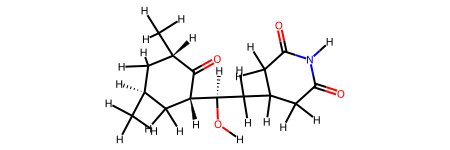

In [ ]:
drugs.Molecule.iloc[-1]

In [ ]:
# Lipinski's rule of 5:
# Poor absorption is likely if the molecule violates more than one of the following conditions:
# Molecular Weight <= 500 Da
# No. Hydrogen Bond Donors <= 10
# No. Hydrogen Bond Acceptors <= 5
# LogP <= 5

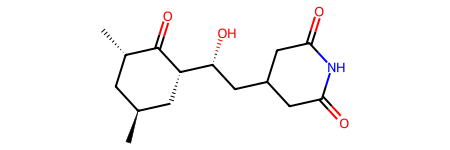

In [ ]:
mol

In [ ]:
# This chunk checks for Lipinski's rule of 5
MW = Descriptors.MolWt(mol)
HBA = Descriptors.NOCount(mol)
HBD = Descriptors.NHOHCount(mol)
LogP = Descriptors.MolLogP(mol)
conditions = [MW <= 500, HBA <= 10, HBD <= 5, LogP <= 5]
pass_ro5 = conditions.count(True) >= 3
print(pass_ro5)

True


In [ ]:
def ro5_check(mol):
  MW = Descriptors.MolWt(mol)
  HBA = Descriptors.NOCount(mol)
  HBD = Descriptors.NHOHCount(mol)
  LogP = Descriptors.MolLogP(mol)
  conditions = [MW <= 500, HBA <= 10, HBD <= 5, LogP <= 5]
  pass_ro5 = conditions.count(True) >= 3
  return pass_ro5

In [ ]:
# Let's make a new category to sort out all the drugs that violate the ro5
# If it follows ro5, the category = 1 else 0

In [ ]:
int(True)

1

In [ ]:
drugs['ro5'] = 0
for idx, mol in enumerate(drugs.Molecule):
  if ro5_check(mol) == True:
    drugs.ro5[idx] = 1 

In [ ]:
drugs.sample(20)

,Drug_ID,Drug,Y,Molecule,ro5
849,20E 22-methyl ether (4),CO[C@H](CCC(C)(C)O)[C@](C)(O)[C@H]1CC[C@@]2(O)...,-4.790000,<rdkit.Chem.rdchem.Mol object at 0x7f429cfb4eb0>,1
708,11,CNC(=O)[C@H](NC(=O)[C@](O)(Cc1ccccc1)CN(Cc1ccc...,-5.470000,<rdkit.Chem.rdchem.Mol object at 0x7f429cfb1070>,0
151,zidovudine,Cc1cn([C@H]2C[C@H](N=[N+]=[N-])[C@@H](CO)O2)c(...,-5.060000,<rdkit.Chem.rdchem.Mol object at 0x7f429cfa1af0>,1
377,Penicillin G,CC1(C)S[C@H]2[C@@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...,-5.869793,<rdkit.Chem.rdchem.Mol object at 0x7f429cfa7e60>,1
772,2f,COC(=O)c1c(Cl)cc(Cl)cc1-c1ccc([C@@H](C)NC(=O)C...,-4.744728,<rdkit.Chem.rdchem.Mol object at 0x7f429cfb2c70>,1
503,20E 22-ethyl ether (5),CCO[C@H](CCC(C)(C)O)[C@](C)(O)[C@H]1CC[C@@]2(O...,-4.860000,<rdkit.Chem.rdchem.Mol object at 0x7f429cfab5a0>,1
237,Ampicillin,CC1(C)SC2C(NC(=O)C(N)c3ccccc3)C(=O)N2C1C(=O)O,-6.070000,<rdkit.Chem.rdchem.Mol object at 0x7f429cfa4120>,1
298,Netivudine (882C87),CC#Cc1cn([C@@H]2O[C@H](CO)[C@@H](O)[C@@H]2O)c(...,-5.168745,<rdkit.Chem.rdchem.Mol object at 0x7f429cfa5bd0>,1
555,Puerarin (34),O=c1c(-c2ccc(O)cc2)coc2c(C3O[C@H](CO)[C@@H](O)...,-6.398970,<rdkit.Chem.rdchem.Mol object at 0x7f429cfaccf0>,1
38,hexapeptide 01,C[C@@H]1NC(=O)[C@H](C)NC(=O)[C@@H](C)NC(=O)[C@...,-5.820000,<rdkit.Chem.rdchem.Mol object at 0x7f429cf568f0>,1


In [ ]:
# Let's look at the descriptors
des_keys = Descriptors.CalcMolDescriptors(drugs.Molecule[0]).keys()

In [ ]:
des_keys

dict_keys(['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10',

In [ ]:
type(des_keys)

dict_keys

In [ ]:
des = Descriptors.CalcMolDescriptors(drugs.Molecule[0])

In [ ]:
len(des)

209

In [ ]:
# Problem! It is difficult to calculate descriptors directly for the dataframe.
# Let's us use DeepChem

In [ ]:
rdkit_featurizer = dc.feat.RDKitDescriptors()

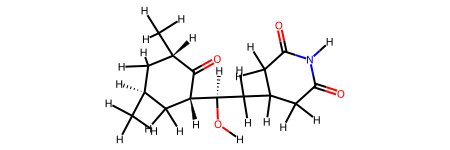

In [ ]:
mol

In [ ]:
rdkit_featurizer.featurize(mol)

array([[ 1.38516320e+01,  1.38516320e+01,  9.73220698e-01,
        -5.20893802e+00,  7.57155600e-01,  2.81352000e+02,
         2.58168000e+02,  2.81162708e+02,  1.12000000e+02,
         0.00000000e+00,  2.26338055e-01, -3.92368254e-01,
         3.92368254e-01,  2.26338055e-01,  1.55000000e+00,
         2.30000000e+00,  2.90000000e+00, -1.72683971e-16,
        -2.46769264e-01, -5.50314207e-17, -2.80808164e+00,
        -1.57050774e-16, -2.81461525e+00,  5.58036532e-18,
        -1.13431736e+00,  2.84389418e+00,  3.31501334e+00,
         1.21392725e+03,  3.50165079e+01,  3.25802068e+01,
         9.58020676e+00,  1.84414285e+01,  1.63691721e+01,
         5.01371018e+00,  3.50535682e+00,  3.50535682e+00,
         2.08667322e+00,  2.08667322e+00,  1.31143743e+00,
         1.31143743e+00, -1.23000000e+00,  2.84389418e+00,
         3.24011651e+00,  6.03773196e+00,  3.44974559e+00,
         1.51124489e+02,  5.10880819e+00,  5.78324495e+00,
         1.41184208e+00,  1.32455591e+01,  0.00000000e+0

In [ ]:
type(rdkit_featurizer.featurize(mol))

numpy.ndarray

In [ ]:
drugs['descriptors'] = drugs['Molecule'].apply(rdkit_featurizer.featurize)

In [ ]:
drugs.sample(5)

,Drug_ID,Drug,Y,Molecule,ro5,descriptors
51,acetaminophen,CC(=O)Nc1ccc(O)cc1,-4.440000,<rdkit.Chem.rdchem.Mol object at 0x7f429d6b3530>,1,"[[11.465040233686066, 11.465040233686066, 0.20..."
374,Epinephrine,CNCC(O)c1ccc(O)c(O)c1,-6.018865,<rdkit.Chem.rdchem.Mol object at 0x7f429cfa7d10>,1,"[[8.076908541194255, 8.076908541194255, 0.6526..."
239,Astemizole,COc1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccc(F)cc3)CC2...,-5.150000,<rdkit.Chem.rdchem.Mol object at 0x7f429cfa4200>,1,"[[14.690161169336502, 14.690161169336502, 0.17..."
680,1,CN1C(=O)CC(N2CCN(CCCN3c4ccccc4Sc4ccc(CC(=O)O)c...,-4.910000,<rdkit.Chem.rdchem.Mol object at 0x7f429cfb0430>,1,"[[13.646667988510561, 13.646667988510561, 0.06..."
531,Ac-Gly-Lys-Ala-NH2,CC(=O)NCC(=O)N[C@@H](CCCCN)C(=O)N[C@@H](C)C(N)=O,-7.010000,<rdkit.Chem.rdchem.Mol object at 0x7f429cfac270>,1,"[[13.65166997354497, 13.65166997354497, 1.1755..."


In [ ]:
drugs.descriptors

0      [[8.856970427059712, 8.856970427059712, 0.8900...
1      [[12.563043391922376, 12.563043391922376, 1.03...
2      [[9.6092470946712, 9.6092470946712, 0.63608489...
3      [[11.160833333333333, 11.160833333333333, 0.03...
4      [[9.97418390967498, 9.97418390967498, 1.177787...
                             ...                        
905    [[11.447758335714909, 11.447758335714909, 2.34...
906    [[13.07531192803108, 13.07531192803108, 0.7630...
907    [[16.36939513581992, 16.36939513581992, 1.1186...
908    [[15.91044979799626, 15.91044979799626, 1.5069...
909    [[13.85163202317964, 13.85163202317964, 0.9732...
Name: descriptors, Length: 910, dtype: object

In [ ]:
drugs.descriptors.isna().value_counts()

False    910
Name: descriptors, dtype: int64

In [ ]:
# Separate the descriptors into columns
for idx, mol in enumerate(drugs.Molecule):
  all_des = Descriptors.CalcMolDescriptors(mol)
  for des in des_keys:
    drugs.loc[idx,des] = all_des[des]

drugs.sample(1)

,Drug_ID,Drug,Y,Molecule,ro5,descriptors,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
608,Fluorescein,O=C(O)c1ccccc1-c1c2ccc(=O)cc-2oc2cc(O)ccc12,-4.77,<rdkit.Chem.rdchem.Mol object at 0x7f429cfae420>,1,"[[12.5907299470778, 12.5907299470778, 0.571009...",12.59073,12.59073,0.571009,-1.566576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
clean_df = drugs[['MolWt','NumValenceElectrons','NumHAcceptors','NumHDonors','NumAromaticRings','MolLogP','Y','ro5']]

In [ ]:
clean_df

,MolWt,NumValenceElectrons,NumHAcceptors,NumHDonors,NumAromaticRings,MolLogP,Y,ro5
0,290.271,110.0,6.0,5.0,2.0,1.54610,-6.220000,1
1,245.366,98.0,1.0,1.0,0.0,3.23070,-3.860000,1
2,299.370,116.0,4.0,1.0,1.0,1.50110,-4.090000,1
3,113.120,44.0,2.0,2.0,0.0,-1.01723,-5.935409,1
4,337.463,132.0,3.0,1.0,1.0,4.22100,-4.840000,1
...,...,...,...,...,...,...,...,...
905,172.268,72.0,2.0,1.0,0.0,3.21170,-4.680000,1
906,330.292,124.0,7.0,3.0,3.0,2.59400,-4.950000,1
907,703.880,272.0,7.0,4.0,4.0,5.66390,-5.080000,0
908,719.836,270.0,9.0,2.0,3.0,4.20832,-5.300000,0


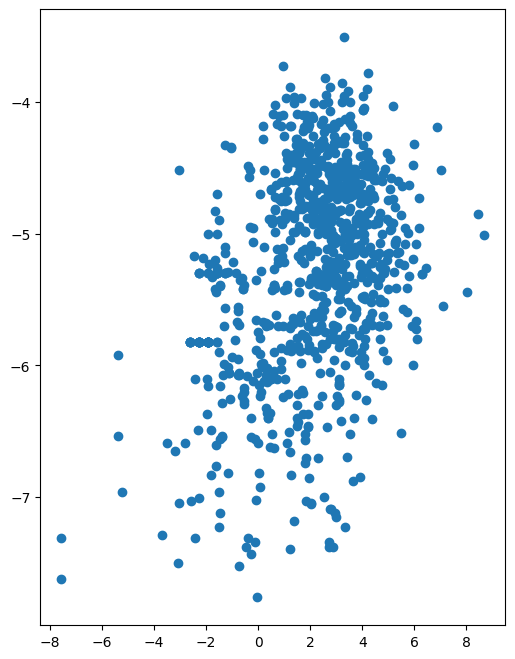

In [ ]:
plt.figure(figsize=(6,8))
plt.plot(clean_df.MolLogP,clean_df.Y,
         'o')
plt.show()

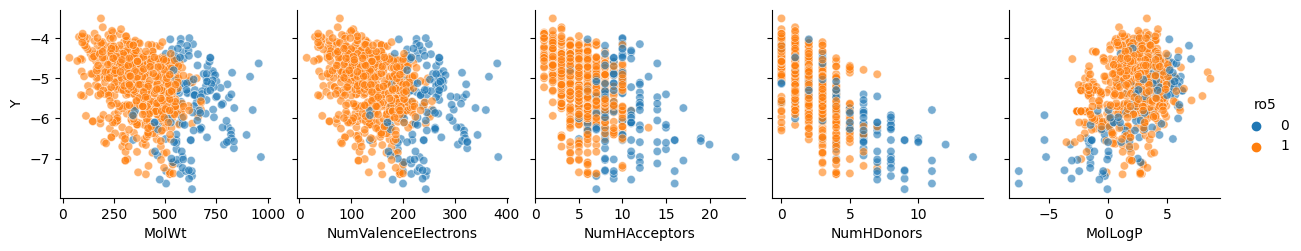

In [ ]:
sns.pairplot(data = clean_df,
                x_vars = ['MolWt', 'NumValenceElectrons', 
                              'NumHAcceptors', 'NumHDonors', 'MolLogP'],
                y_vars = ['Y'],
                hue='ro5',
                plot_kws = {'alpha':.6})

plt.show()

In [ ]:
X = drugs
X.head(1)

,Drug_ID,Drug,Y,Molecule,ro5,descriptors,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,(-)-epicatechin,Oc1cc(O)c2c(c1)OC(c1ccc(O)c(O)c1)C(O)C2,-6.22,<rdkit.Chem.rdchem.Mol object at 0x7f429cffe1f0>,1,"[[8.856970427059712, 8.856970427059712, 0.8900...",8.85697,8.85697,0.890041,-3.607962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = X.drop(columns=['Drug_ID','Drug','Molecule','descriptors'])
X.head(1)

,Y,ro5,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-6.22,1,8.85697,8.85697,0.890041,-3.607962,0.509593,290.271,276.159,290.079038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_fea = X.iloc[:,2:]

In [ ]:
X_fea.head(1)

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,8.85697,8.85697,0.890041,-3.607962,0.509593,290.271,276.159,290.079038,110.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X['ro5']

0      1
1      1
2      1
3      1
4      1
      ..
905    1
906    1
907    0
908    0
909    1
Name: ro5, Length: 910, dtype: int64

In [ ]:
# Setting the ro5 as the target
y = X['ro5']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: ro5, dtype: int64

In [ ]:
# splitting and stratifying on the target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_fea, y,  
                                   random_state=414,
                                   stratify=y,
                                   test_size=.2)
print(y_train.value_counts())
print(y_test.value_counts())

1    610
0    118
Name: ro5, dtype: int64
1    153
0     29
Name: ro5, dtype: int64


In [ ]:
X_train.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
898,10.322064,10.322064,0.524619,-5.207921,0.457868,514.722,472.386,514.353243,202.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
211,15.157321,15.157321,2.293131,-5.609596,0.785692,360.450,332.226,360.193674,142.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
588,13.607631,13.607631,0.058428,-5.196121,0.494073,535.670,502.406,535.225326,200.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
355,14.892046,14.892046,0.629422,-6.878986,0.250316,522.627,492.387,522.193691,194.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
617,12.287882,12.287882,0.179374,-3.533069,0.799428,235.239,222.135,235.084458,90.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
882,14.609118,14.609118,1.160198,-4.769527,0.312961,450.396,428.220,450.116212,172.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242,14.022235,14.022235,0.909994,-6.483747,0.560412,430.379,416.267,430.061041,154.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
319,15.001012,15.001012,0.536582,-5.871354,0.373567,608.688,568.368,608.273381,236.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
480,14.891985,14.891985,0.551158,-6.216468,0.538190,434.453,415.301,434.117252,158.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
393,16.717400,16.717400,0.629090,-6.710539,0.109755,820.992,764.544,820.427196,318.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train.head()

898    1
211    1
588    1
355    1
617    1
Name: ro5, dtype: int64

In [ ]:
y_test.head()

882    0
242    1
319    0
480    1
393    0
Name: ro5, dtype: int64

In [ ]:
len(X_train)

728

In [ ]:
X_train[X_train.isnull().any(axis=1)]

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
91,13.15109,13.15109,0.0,-3.578285,0.366873,295.27,281.158,295.082052,104.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# need to drop [91]
X_train = X_train.drop(91)

In [ ]:
len(X_train)

727

In [ ]:
for des in des_keys:
  print(X_train[des].isna().value_counts())

False    727
Name: MaxAbsEStateIndex, dtype: int64
False    727
Name: MaxEStateIndex, dtype: int64
False    727
Name: MinAbsEStateIndex, dtype: int64
False    727
Name: MinEStateIndex, dtype: int64
False    727
Name: qed, dtype: int64
False    727
Name: MolWt, dtype: int64
False    727
Name: HeavyAtomMolWt, dtype: int64
False    727
Name: ExactMolWt, dtype: int64
False    727
Name: NumValenceElectrons, dtype: int64
False    727
Name: NumRadicalElectrons, dtype: int64
False    727
Name: MaxPartialCharge, dtype: int64
False    727
Name: MinPartialCharge, dtype: int64
False    727
Name: MaxAbsPartialCharge, dtype: int64
False    727
Name: MinAbsPartialCharge, dtype: int64
False    727
Name: FpDensityMorgan1, dtype: int64
False    727
Name: FpDensityMorgan2, dtype: int64
False    727
Name: FpDensityMorgan3, dtype: int64
False    727
Name: BCUT2D_MWHI, dtype: int64
False    727
Name: BCUT2D_MWLOW, dtype: int64
False    727
Name: BCUT2D_CHGHI, dtype: int64
False    727
Name: BCUT2D_CHGLO, dt

In [ ]:
# Let's do the same for y_train, X_test, and y_test

In [ ]:
# y_train
y_train = y_train.drop(91)
print(len(y_train))

727


In [ ]:
# Now for the test set:
X_test[X_test.isnull().any(axis=1)]

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
102,11.559838,11.559838,0.0,-3.656906,0.638394,252.245,239.141,252.076239,88.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Remove entry 102! 
print(len(X_test))
X_test = X_test.drop(102)
y_test = y_test.drop(102)
print(len(y_test))

182
181


In [ ]:
for des in des_keys:
  print(X_test[des].isna().value_counts())

False    181
Name: MaxAbsEStateIndex, dtype: int64
False    181
Name: MaxEStateIndex, dtype: int64
False    181
Name: MinAbsEStateIndex, dtype: int64
False    181
Name: MinEStateIndex, dtype: int64
False    181
Name: qed, dtype: int64
False    181
Name: MolWt, dtype: int64
False    181
Name: HeavyAtomMolWt, dtype: int64
False    181
Name: ExactMolWt, dtype: int64
False    181
Name: NumValenceElectrons, dtype: int64
False    181
Name: NumRadicalElectrons, dtype: int64
False    181
Name: MaxPartialCharge, dtype: int64
False    181
Name: MinPartialCharge, dtype: int64
False    181
Name: MaxAbsPartialCharge, dtype: int64
False    181
Name: MinAbsPartialCharge, dtype: int64
False    181
Name: FpDensityMorgan1, dtype: int64
False    181
Name: FpDensityMorgan2, dtype: int64
False    181
Name: FpDensityMorgan3, dtype: int64
False    181
Name: BCUT2D_MWHI, dtype: int64
False    181
Name: BCUT2D_MWLOW, dtype: int64
False    181
Name: BCUT2D_CHGHI, dtype: int64
False    181
Name: BCUT2D_CHGLO, dt

In [ ]:
# Now there should be no NAN values in the DataFrame 

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
rf = RandomForestClassifier(100, 
                            max_depth = 3, 
                            random_state = 614,
                            max_samples = 80)  

In [ ]:
des_keys

dict_keys(['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10',

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_samples=80, random_state=614)

In [ ]:
rf_preds = rf.predict(X_test)

In [ ]:
rf_preds

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1])

In [ ]:
rf.feature_importances_

array([0.00468526, 0.00287952, 0.0029879 , 0.00180148, 0.04462267,
       0.05723384, 0.05604516, 0.05603402, 0.03296327, 0.        ,
       0.00217254, 0.0019171 , 0.00529337, 0.00266755, 0.00098039,
       0.00032801, 0.00179629, 0.00079063, 0.00215155, 0.00161515,
       0.00159459, 0.        , 0.00507541, 0.00225512, 0.00078431,
       0.00348667, 0.00516484, 0.02728247, 0.01787976, 0.00224777,
       0.01482813, 0.02079295, 0.00596792, 0.01905338, 0.03089408,
       0.00916254, 0.00459319, 0.00698175, 0.02983994, 0.00762723,
       0.01021112, 0.        , 0.01609557, 0.00966584, 0.00215546,
       0.03164774, 0.0146217 , 0.01396598, 0.00177458, 0.00237133,
       0.00260366, 0.        , 0.        , 0.        , 0.00032407,
       0.00438149, 0.00281437, 0.00665617, 0.00162567, 0.00150322,
       0.04034633, 0.00093595, 0.00593827, 0.00588963, 0.        ,
       0.00369043, 0.        , 0.00070897, 0.        , 0.01166041,
       0.        , 0.00058797, 0.00263856, 0.00151152, 0.00082

In [ ]:
# Most important feature
np.argmax(rf.feature_importances_)

5

In [ ]:
# This is MolWt

In [ ]:
rf.feature_importances_[5]

0.05723383914876099

In [ ]:
rf.feature_importances_

array([0.00468526, 0.00287952, 0.0029879 , 0.00180148, 0.04462267,
       0.05723384, 0.05604516, 0.05603402, 0.03296327, 0.        ,
       0.00217254, 0.0019171 , 0.00529337, 0.00266755, 0.00098039,
       0.00032801, 0.00179629, 0.00079063, 0.00215155, 0.00161515,
       0.00159459, 0.        , 0.00507541, 0.00225512, 0.00078431,
       0.00348667, 0.00516484, 0.02728247, 0.01787976, 0.00224777,
       0.01482813, 0.02079295, 0.00596792, 0.01905338, 0.03089408,
       0.00916254, 0.00459319, 0.00698175, 0.02983994, 0.00762723,
       0.01021112, 0.        , 0.01609557, 0.00966584, 0.00215546,
       0.03164774, 0.0146217 , 0.01396598, 0.00177458, 0.00237133,
       0.00260366, 0.        , 0.        , 0.        , 0.00032407,
       0.00438149, 0.00281437, 0.00665617, 0.00162567, 0.00150322,
       0.04034633, 0.00093595, 0.00593827, 0.00588963, 0.        ,
       0.00369043, 0.        , 0.00070897, 0.        , 0.01166041,
       0.        , 0.00058797, 0.00263856, 0.00151152, 0.00082

In [ ]:
# Get the 5 most important features
idxs = []
for i, imp in enumerate(rf.feature_importances_):
  if imp > 0.04:
    idxs.append(i)

print(idxs)

[4, 5, 6, 7, 60]


In [ ]:
from sklearn.metrics import roc_curve
fprs,tprs,cutoffs = roc_curve(y_test, rf_preds)
print(fprs)
print(tprs) # True positive rate

[0.         0.27586207 1.        ]
[0.         0.98684211 1.        ]
